# Predicting the sale Price of Bulldozers using ML 

In this notebook, we're going to go through an example ML project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

> How well can we predit the future sale price of a bulldozer, given its characteristics and previous examples of how m uch similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of the project, check: www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation\

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a ML model which minimises RMSLE.

## 4. Features
Kaggle provides a data dictionary detailing all of the features fo the dataset. You can view this data on the datasheet. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [20]:
# Import the training and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", 
                low_memory=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [22]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [23]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

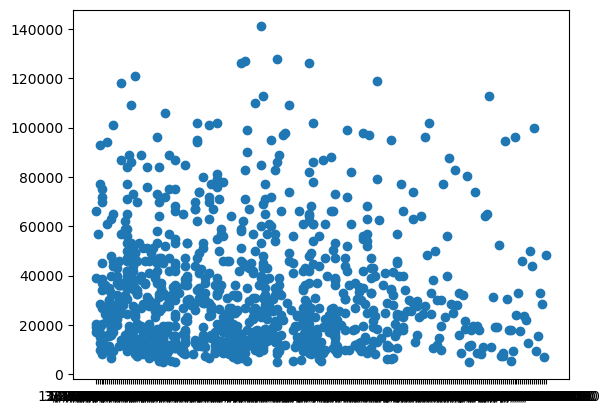

In [24]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [25]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

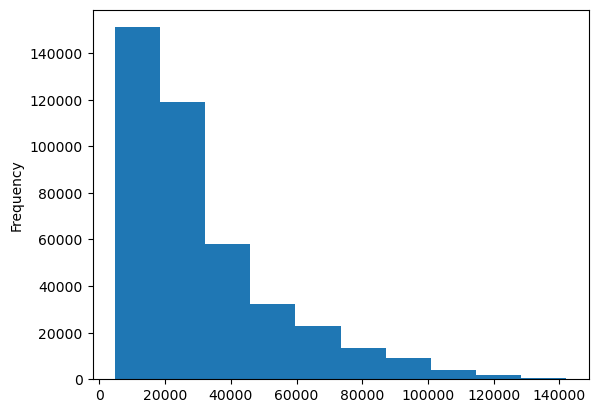

In [26]:
df.SalePrice.plot.hist();

### Parsing dates 

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dtes in it using the `parse_dates` parameter.

In [27]:
# Import data again but this time parse dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [28]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

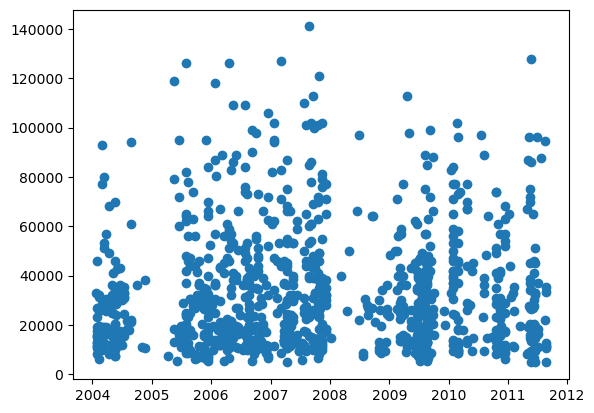

In [29]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [30]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [32]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate - good idea for time-series problem


When working with time series data, it's a good idea to sort it by date

In [36]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe. so that we've still got our orignal data

In [40]:
# Make a copy, we will manipulate only df_temp, and df is the original dataFrame
df_tmp = df.copy()

In [41]:
df_tmp.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

# Feature engineering 
## add datetime parameter for `saledate` column

In [43]:
# dt - datetime
df_tmp["saleYear"] = df_tmp.saledate.dt.year 
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [44]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [45]:
# Now we've enriched our Dataframe with date time features, we can remove the date 
df_tmp.drop("saledate", axis=1, inplace=True)

In [47]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# 5. Modelling 

We've done enough EDA - exploratory data analysis (we could always do more) but let's start to do some model-driven EDA 

In [48]:
# Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_jobs=-1, # use all processes 
    random_state=42)

X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]
model.fit(X, y)


ValueError: could not convert string to float: 'Medium'

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [50]:
df_tmp["UsageBand"].dtype

dtype('O')

In [51]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### Turn string/non-numerical data  to categories
One way we can turn all of our data into numbers is by converting them into pandas categories

We can cehck the different datatypes compatible with pandas here:  https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [59]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


In [58]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [63]:
# Find the columns which contain strings 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [62]:
# If you're wondering what df.items() does, here's an example
random_dict = {"key1": "hello",
              "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key}, this is a value: {value}")

this is a key: key1, this is a value: hello
this is a key: key2, this is a value: world!


In [75]:
# This will turn all of the string (object in this case because string doesn't catch all the object values) values into category values 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [76]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [77]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [78]:
df_tmp.state.cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

Thanks to panda categories, now we have access all of our data in the form of numbers.

In [80]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data 

In [81]:
# Export current tmp dataframe 
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv", index=False)

In [82]:
# Improt preprocessed data
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv", low_memory=False)

In [83]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


## Fill missing values

### Fill numeric missing values first 

In [85]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [86]:
df_tmp.ModelID

0          8434
1          9105
2          4138
3          3854
4          7110
          ...  
412693     4605
412694     6868
412695    17231
412696    17231
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [87]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [88]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # if there is null value (> 0) - statement is true 
            # Add a binary column which tells us if the data was missing - We can evaluate if this is a filled number or it was median 
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median - median and not mean because median is more robust to outlier
            df_tmp[label] = content.fillna(content.median())

In [89]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,), 100)
hundreds_bil = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_bil), np.median(hundreds), np.median(hundreds_bil)

(100.0, 999100.8991008991, 100.0, 100.0)

In [90]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [92]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [93]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

## Filling and turning categorical variables into numbers

In [94]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [105]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categoris into numbers and add + 1, why + 1 -> because pandas automatically assigns the field with no values to -1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [97]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [98]:
pd.Categorical(df_tmp["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [101]:
pd.Categorical(df_tmp["UsageBand"]).codes + 1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [106]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [107]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [111]:
# Check if all our data are numeric
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a ML model

In [112]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
2,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
3,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
4,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True


In [113]:
%%time
# Instantiate model
X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]

model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
model.fit(X, y)

CPU times: user 11min 26s, sys: 4.49 s, total: 11min 31s
Wall time: 1min 32s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [114]:
# Score the model -  this is going to return r2
model.score(X, y)

0.9875966080326709

**Question:** Why is the score very high, why doesn't the above metric hold water (reliable)? Because it is test on the trained data 

### Splitting data into train/validation sets

In [116]:
df_tmp.saleYear
# All in 2011 are training set, 2012 - validation set 

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [117]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [118]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape,X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [123]:
# Create evaluation function (teh competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores



### Testing our model on a subset (to tune the hyperparameteres)

In [124]:
# # This takes far too long for experimenting
# %%time
# model = RandomForestRegressor(n_jobs = -1, random_staet=42)

# model.fit(X_train, y_train)

In [125]:
# Change max_samples values
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [126]:
%%time
# Cutting down on the max number of samples each estimator can see improve time 
model.fit(X_train, y_train)

CPU times: user 23 s, sys: 270 ms, total: 23.2 s
Wall time: 3.37 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [127]:
show_scores(model)

{'Training MAE': 5548.995840324089,
 'Valid MAE': 7179.6961392897265,
 'Training RMSLE': 0.25737726780537257,
 'Valid RMSLE': 0.29404344200903443,
 'Training R^2': 0.8610738743845616,
 'Valid R^2': 0.8320179198265638}

### Hyperparameter tuning with RandomizedSearchCV

How to improve the hyperparameters

In [135]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt"],
          "max_samples": [10000]}

# Instantiate RandomSearchCV model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=10,
    cv=5,
    verbose=True)

# Fit the randomizedsearchcv model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 25.1 s, sys: 3.44 s, total: 28.5 s
Wall time: 40.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [136]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6110.174997155886,
 'Valid MAE': 7412.377008610562,
 'Training RMSLE': 0.2774489757151709,
 'Valid RMSLE': 0.30425253126358515,
 'Training R^2': 0.8351331113039606,
 'Valid R^2': 0.8246997712406599}

# Train a model with the best hyperparameters

**Note:** These were found after 100 iteration of `RandomizedSearchCV`

In [139]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(
    n_estimators=40,
    min_samples_leaf=1,
    min_samples_split=14,
    max_features=0.5,
    n_jobs=-1,
    max_samples=None
)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 2min 2s, sys: 944 ms, total: 2min 3s
Wall time: 17.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [140]:
# Evaluate the best hyperparameter 
# Scores for ideal model, trained on all the data 
show_scores(ideal_model)

{'Training MAE': 2961.2009652814204,
 'Valid MAE': 5902.750023518706,
 'Training RMSLE': 0.1448879512409839,
 'Valid RMSLE': 0.2449751117224317,
 'Training R^2': 0.958694237446214,
 'Valid R^2': 0.8833925631085584}

In [141]:
# Scores on rs_model (only trained on ~10,000 samples
show_scores(rs_model)

{'Training MAE': 6110.174997155886,
 'Valid MAE': 7412.377008610562,
 'Training RMSLE': 0.2774489757151709,
 'Valid RMSLE': 0.30425253126358515,
 'Training R^2': 0.8351331113039606,
 'Valid R^2': 0.8246997712406599}

## Make predictions on test data 

In [198]:
# Import the test data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [199]:
df_test.isna()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
12453,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
12454,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
12455,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True


In [200]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Preprocessing the data (getting the test dataset in the same format our training dataset)

In [201]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed fd.
    """
    # dt - datetime
    df["saleYear"] = df.saledate.dt.year 
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum(): # if there is null value (> 0) - statement is true 
                # Add a binary column which tells us if the data was missing - We can evaluate if this is a filled number or it was median 
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median - median and not mean because median is more robust to outlier
                df[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categoris into numbers and add + 1, why + 1 -> because pandas automatically assigns the field with no values to -1
            df[label] = pd.Categorical(content).codes + 1
    
    return df
    

In [202]:
# process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [203]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1728883,1523610,9105,132,99.0,1986,0.0,0,4772,1852,...,True,True,True,True,True,True,True,True,True,True
2,1508502,1153157,4138,132,99.0,1972,0.0,0,2347,713,...,True,True,True,True,True,False,False,False,True,True
3,1452578,1544443,3854,132,99.0,1974,0.0,0,1767,535,...,True,True,True,True,True,True,True,True,False,False
4,1403418,1390168,7110,132,99.0,1986,0.0,0,744,245,...,True,True,True,True,True,True,True,True,True,True


In [204]:
# Making the test data in the same format as the train data 
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [205]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False

In [206]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [207]:
# Finally, now our test data frame has the same number of column as our trained data 
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [209]:
# Define column order in the training dataset 
column_order = X_train.columns.tolist()

In [210]:
df_test = df_test[column_order]

In [211]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [214]:
test_preds = ideal_model.predict(df_test)

In [215]:
test_preds

array([18835.46901864, 18840.12656388, 48887.7623287 , ...,
       13661.52640365, 15342.77395079, 27265.39499371])

We've made some predictions but they're not in the same format Kaggle is asking for: www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [216]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame() # empty dataframe
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18835.469019
1,1227844,18840.126564
2,1227847,48887.762329
3,1227848,61571.960749
4,1227863,58175.406443
...,...,...
12452,6643171,41041.359556
12453,6643173,11153.555039
12454,6643184,13661.526404
12455,6643186,15342.773951


In [217]:
# Export prediction data
df_preds.to_csv("bluebook-for-bulldozers/test_prediction.csv", index=False)

### Feature importance 

Which attributes of the data were most important when it comes to predicting the ***target variable*** (SalePrice)

In [221]:
# Find feature importance of our best model
len(ideal_model.feature_importances_)

102

In [227]:
# Helper function to visualize feature importance 
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

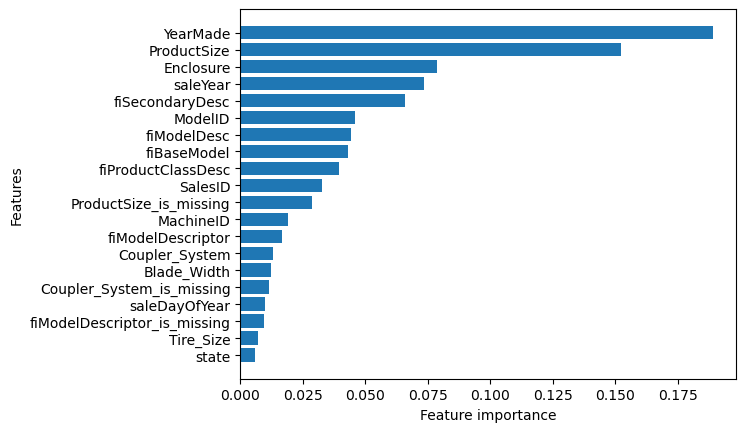

In [228]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [229]:
X_train["ProductSize"].value_counts()

ProductSize
0    210775
4     62274
3     49678
6     26494
5     24840
2     20975
1      6089
Name: count, dtype: int64

In [230]:
df["Enclosure"].value_counts()

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful

**Final challenge:** What other machine learning models could you try. Hint: check out the regression section of this map, or try to look at something like CatBoost.ai or XGBoost.ai